# Worksheet 15

Name:  Pranesh Jayasundar
UID:  U08334002

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

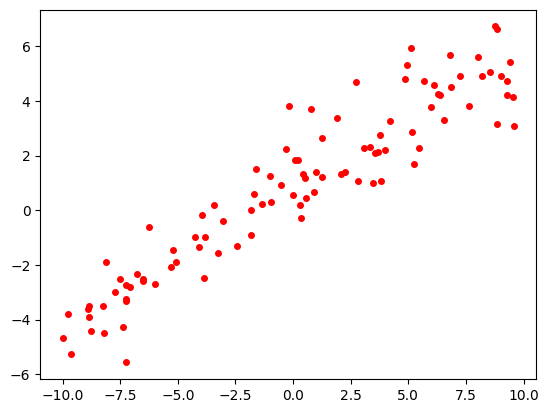

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , 0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = beta[0]+(beta[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

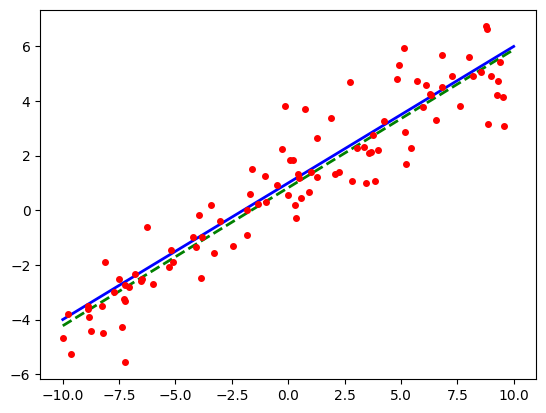

[0.82679011 0.50554311] [1.  0.5]


In [2]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta_est = np.linalg.inv(X.T@X) @X.T @ ylin

xplot = np.linspace(-10,10,50)
y_true=beta[0]+beta[1]*xplot
yestplot = beta_est[0] + beta_est[1] * xplot
plt.plot(xplot, y_true,'b-',lw=2)
plt.plot(xplot, yestplot,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()
print(beta_est,beta)

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

Pretty close to each other.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

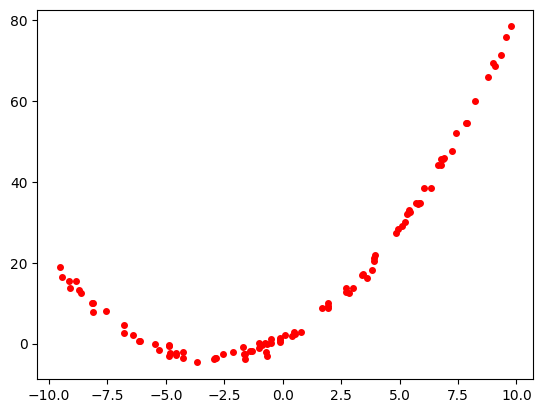

In [3]:
beta = np.array([ 1 , 3,0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = beta[0]+(beta[1]*xlin)+(beta[2]*xlin**2)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

[1.14146092 3.00224008 0.49779854]


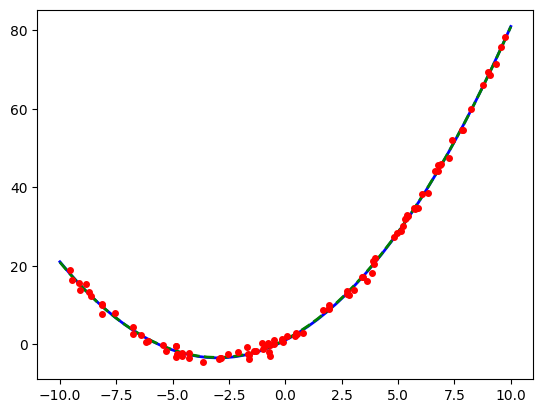

[1.14146092 3.00224008 0.49779854] [1.  3.  0.5]


In [4]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin,xlin**2]).T
beta_est = np.linalg.inv(X.T@X) @X.T @ ylin
print(beta_est)

xplot = np.linspace(-10,10,50)
y_true=beta[0]+beta[1]*xplot+(beta[2]*xplot**2)
yestplot = beta_est[0] + beta_est[1] * xplot + beta_est[2]*xplot**2
plt.plot(xplot, y_true,'b-',lw=2)
plt.plot(xplot, yestplot,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()
print(beta_est,beta)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Close to the true values.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

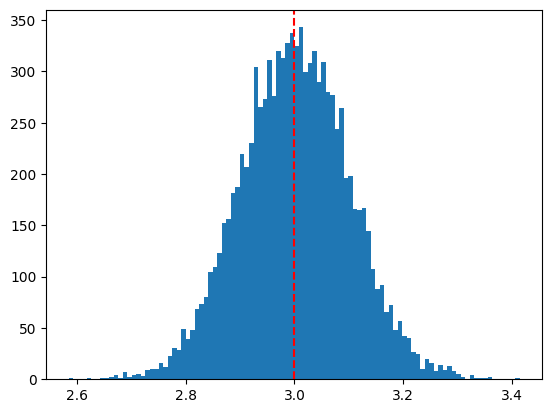

In [5]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 3,4 ])
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + true_beta[1]*xlin + np.random.randn(100)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T@X) @X.T @ ylin)

plt.hist(np.array(betas)[:, 0], bins=100)
plt.axvline(x=true_beta[0], c='r', linestyle='dashed')
plt.show()